## Shor's algorithm
One of the most famous quantum algorithm invented by Peter Shor in 1994. It allows for effective factorization of numbers being a product of two great prime numbers, which is a basis for RSA - widely used cryptographics algorithm. If someone could succesfully implement this method to work with number big enough this would pose a threat great to currently used cybersecurity systems.

In [1]:
from qiskit import Aer
from qiskit.aqua.algorithms import Shor, Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle
from qiskit.visualization import plot_histogram

In [2]:
N = 15

In [3]:
shor = Shor(N)

In [4]:
backend = Aer.get_backend('qasm_simulator')
result = shor.run(backend)
print("The factors of {} computed by the Shor's algorithm: {}.".format(N, result['factors'][0]))

The factors of 15 computed by the Shor's algorithm: [3, 5].


In [ ]:
circuit = shor.construct_circuit(True)
circuit.draw()

_Sidenote:_ Shor's algorithm requires number of qubits proportional to number of bits required to express the factorized number. Among publicly available backends only `qasm_simulator` offers enough qubits to execute the Shor's algorithm and only for at most 5-bit numbers.

**Exercise.** Use Shor's algorithm to factorize number 21.

## Grover's algorithm
Another notable quantum algorithm which is used to find a selected element in an unordered set of size $N$ in time $\mathcal{O}(\sqrt{N})$ (in contrary to classical world where there are required $\mathcal{O}(N/2)$ steps on average).

Short explanation of DIMACS CNF notation:
- lines starting with `c` are treated a comments,
- first line (excluding comments) is required to start with `p cnf `,
- subsequent lines contain the logical alternative expressions - each number `(1, 2, 3...)` denotes a logical variable, minus sign (`-`) before them denote negation and `0` at the end of each line is a requirement of the notation,
- the final formula is the conjunction of all the lines. The below expresion is resolved as follows:<br/>
`(~v1 | ~v2 | ~v3) & (~v1 | ~v2 | v3) & (~v1 | v2 | ~v3) & (~v1 | v2 | v3) & (v1 | ~v2 | ~v3) & (v1 | ~v2 | v3) & (v1 | v2 | ~v3)`     

In [5]:
sat_cnf = """
c Example DIMACS 3-sat
p cnf 3
-1 -2 -3 0
-1 -2 3 0
-1 2 -3 0
-1 2 3 0
1 -2 -3 0
1 -2 3 0
1 2 -3 0
"""
oracle = LogicalExpressionOracle(sat_cnf)

In [6]:
grover = Grover(oracle)

In [7]:
backend = Aer.get_backend('qasm_simulator')
result = grover.run(backend, shots=1)
print(result["result"])

[-1, -2, -3]


In [ ]:
circuit = grover.construct_circuit(True)
circuit.draw(output='mpl')

**Exercise.** Use Grovers algorithm to find a 5-bit number that has exactly one bit set in every 3-bit subsequence.

In [8]:
sat_cnf = """
p cnf 3
-1 -2 0
-1 -3 0
-2 -3 0
1 2 3 0
-2 -3 0
-2 -4 0
-3 -4 0
2 3 4 0
-3 -4 0
-3 -5 0
-4 -5 0
3 4 5 0
"""
oracle = LogicalExpressionOracle(sat_cnf)

In [9]:
grover = Grover(oracle)

In [10]:
backend = Aer.get_backend('qasm_simulator')
result = grover.run(backend, shots=1024)
print(result["result"])

[-1, -2, 3, -4, -5]


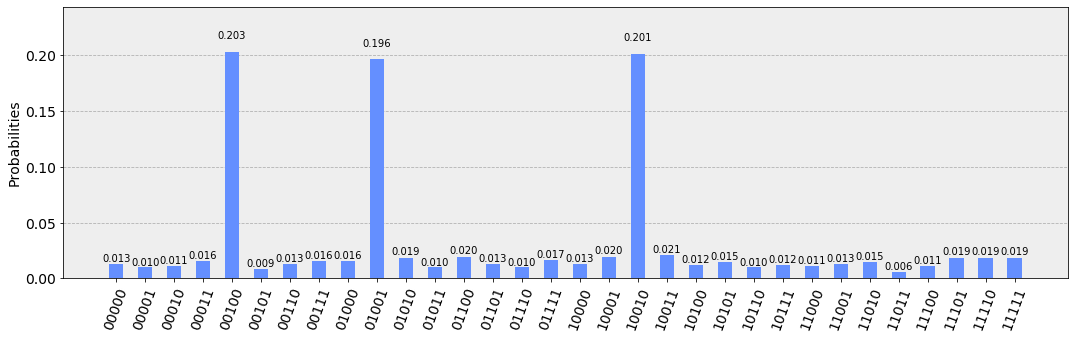

In [11]:
plot_histogram(result['measurement'], figsize=(18, 5))

In [ ]:
circuit = grover.construct_circuit(True)
circuit.draw(output='mpl')